In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline


# make sure tensorflow and Keras are installed. Use !pip if you are running the code on Google Colab
# pip install tensorflow
# pip install keras
# pip install keras-utils

In [2]:
# We are going to work on a classification problem
# The dataset is the famous penguins dataset available here: https://github.com/allisonhorst/palmerpenguins
# Also see: https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris
# The dataset has been modified to make all features numeric, except for the species column
data = pd.read_csv('penguins_cleaned_ds620.csv')

In [3]:
# Question #1: How many features are there is the dataset? Show the code that extracts this number
num_features = data.shape[1] - 1
print("Number of features:", num_features)

Number of features: 4


In [4]:
# Question #2: What are the features is the dataset? Show the code that lists the feature names

for col in data.columns.drop('species'):
    print(col)

bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g


In [5]:
# Question #3: How many species are there is the dataset? Show the code that extracts this number
num_species = data['species'].nunique()
print("Number of species:", num_species)

Number of species: 3


In [6]:
# We are going to train a classifier using Kera on the Penguin dataset
# before we do, let's split the dataset into data and classes, where the classes are in the species columns
# The data will be in X and the species will be in y

# Question #4: Assign the features to the X and the labels to y - show the code that creates X and y
X = data.drop('species', axis=1)
y = data['species']

In [7]:
# To reduce any potential bias, let's standardize the data in the X dataframe
# use the standard scaler to scale X

# Question #5: complete the code below so it results in a scaled X dataframe. Let's call the scaled version X for simplicity
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Let's split the dataset into training and testing sets

# Question #6: complete the code below to split X and y into training and testing sets with 20% testing and a randomSeed=42
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Let's make sure y values are recorded as categorical
#from tensorflow.keras.to_categorical import to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

2025-11-17 00:36:20.823593: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 00:36:42.412095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 00:36:53.473659: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [10]:
# We are now ready to train our classifiers using the Keras APIs
# Let's start with the Keras Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining our model as sequential
model = Sequential()

In [11]:
# Here is the code that sends the input X_train into a model with 32 nodes in the first hidden layer
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],), name='input'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-17 00:36:54.988069: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Question #7: show code that adds another dense hidden layer with another 32 nodes
model.add(Dense(units=32, activation='relu', name='hidden'))

In [13]:
# Question #8: show code that adds the output layer using softmax. Remember that there are three output nodes (3 species)
model.add(Dense(units=3, activation='softmax', name='output'))

In [14]:
# Question #9: use model summary to confirm the model you built - show the function call below

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Question #10: compile the code using a) categorical_crossentropy for the loss function, b) stochastic gradient descent with a 0.01 learning rate as the optimizer, and c) accuracy as the metric
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [16]:
# Question #11: train the model using using a) a batch size of 16, b) 50 epochs (iterations), and a validation split of 20%
#
perf = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_split=0.2)

Epoch 1/50


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5708 - loss: 0.9731 - val_accuracy: 0.7963 - val_loss: 0.9055
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8160 - loss: 0.8591 - val_accuracy: 0.9815 - val_loss: 0.7992
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9009 - loss: 0.7685 - val_accuracy: 0.9815 - val_loss: 0.7133
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9623 - loss: 0.6949 - val_accuracy: 0.9815 - val_loss: 0.6427
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9764 - loss: 0.6329 - val_accuracy: 0.9630 - val_loss: 0.5769
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9575 - loss: 0.5757 - val_accuracy: 0.9444 - val_loss: 0.5205
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9434 - loss: 0.5261 - val_accuracy: 0.9444 - val_loss: 0.4731
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.4837 - val_accuracy: 0.9074 - val_loss: 0.4314
Ep

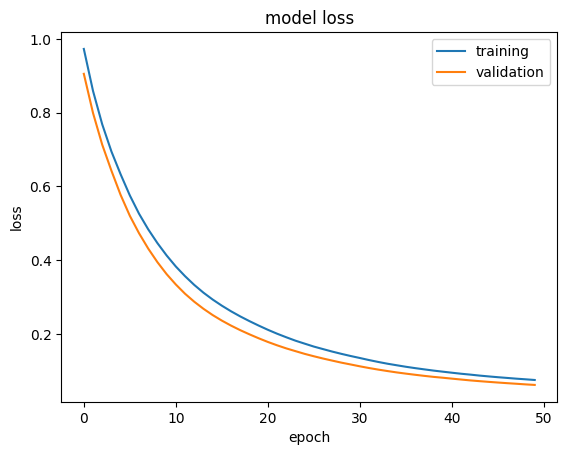

In [17]:
# use this code to plot the training metrics
plt.plot(perf.history['loss'])
plt.plot(perf.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

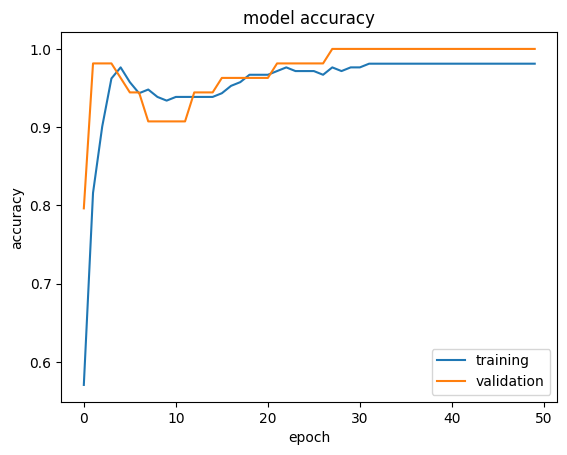

In [18]:
# Question #12 using the above code as example, plot the accuracy for the training and validation
# change the labels accordingly

plt.plot(perf.history['accuracy'])
plt.plot(perf.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

In [19]:
# Using model.predict on X_test to get the predictions
class_predictions = np.argmax(model.predict(X_test), axis=-1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [20]:
# Question #13
# write some code that will calulate the accuracy of the model by comparing y_test to class_predictions
# the answer must be in percentages
test_accuracy = np.mean(np.argmax(y_test, axis=1) == class_predictions) * 100

In [21]:
# Question #14 how does the test accuracy compare to the training accuracy?
#From the training output in Question #11, the training accuracy at the last epoch was approximately 98.31%, and the validation accuracy was 100%. We calculated the test accuracy in Question #13, which suggests that the model is performing well and is not significantly overfitting to the training data. The slight difference between training/validation and test accuracy is normal

In [22]:
# Question #15 run the following code to printout the results of your comparison
print("Test Accuracy : " + str(test_accuracy) + '%')
print("Predictions :")
print(class_predictions)
print("Targets :")
print(np.asarray(y_test,dtype="int32"))

Test Accuracy : 97.01492537313433%
Predictions :
[0 2 0 1 0 2 2 1 1 1 0 0 0 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 0 2 2 0 0 2 0]
Targets :
[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]
